# Essential Modules

In [3]:
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import cross_val_score


## **Read and Load Data**

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
duplicates = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicates))

Number of duplicate rows: 0


In [10]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
df.drop('Unnamed: 32', axis = 1, inplace = True)

In [12]:
df.drop('id', axis = 1, inplace = True)

In [13]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [14]:
#The Diagnosis feature is converted to binary values using one-hot encoding.
df['diagnosis_encoded'] = pd.get_dummies(df['diagnosis'], drop_first=True)
df.drop('diagnosis',axis = 1 , inplace = True)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [15]:
df['diagnosis_encoded'].value_counts()

0    357
1    212
Name: diagnosis_encoded, dtype: int64

In [16]:
features_list = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

## All features should be in decimal format with a precision of four digits

In [17]:
#the features are decimal values with four significant digits
for feature in features_list:
    df[feature] = df[feature].round(4)

## Resampling & One hot encoding of diagnosis feature


In [18]:
# handling class imbalance by oversampling the minority
#The minority class is upsampled to match the majority dataset count to resolve thiss

# Separate majority and minority classes
majority_class = df[df['diagnosis_encoded'] == 0]
minority_class = df[df['diagnosis_encoded'] == 1]

# Upsample the minority class
minority_upsampled = resample(minority_class,
                              replace=True,
                              n_samples=len(majority_class),
                              random_state=42)

# Combine the upsampled minority class with the majority class
df = pd.concat([majority_class, minority_upsampled])
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
19,13.540,14.36,87.46,566.3,0.0978,0.0813,0.0666,0.0478,0.1885,0.0577,...,19.26,99.70,711.2,0.1440,0.1773,0.2390,0.1288,0.2977,0.0726,0
20,13.080,15.71,85.63,520.0,0.1075,0.1270,0.0457,0.0311,0.1967,0.0681,...,20.49,96.09,630.5,0.1312,0.2776,0.1890,0.0728,0.3184,0.0818,0
21,9.504,12.44,60.34,273.9,0.1024,0.0649,0.0296,0.0208,0.1815,0.0690,...,15.66,65.13,314.9,0.1324,0.1148,0.0887,0.0623,0.2450,0.0777,0
37,13.030,18.42,82.61,523.8,0.0898,0.0377,0.0256,0.0292,0.1467,0.0586,...,22.81,84.46,545.9,0.0970,0.0462,0.0483,0.0501,0.1987,0.0617,0
46,8.196,16.84,51.71,201.9,0.0860,0.0594,0.0159,0.0059,0.1769,0.0650,...,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.0256,0.3105,0.0741,0


In [19]:
df['diagnosis_encoded'].value_counts()

0    357
1    357
Name: diagnosis_encoded, dtype: int64

In [20]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
19,13.540,14.36,87.46,566.3,0.0978,0.0813,0.0666,0.0478,0.1885,0.0577,...,19.26,99.70,711.2,0.1440,0.1773,0.2390,0.1288,0.2977,0.0726,0
20,13.080,15.71,85.63,520.0,0.1075,0.1270,0.0457,0.0311,0.1967,0.0681,...,20.49,96.09,630.5,0.1312,0.2776,0.1890,0.0728,0.3184,0.0818,0
21,9.504,12.44,60.34,273.9,0.1024,0.0649,0.0296,0.0208,0.1815,0.0690,...,15.66,65.13,314.9,0.1324,0.1148,0.0887,0.0623,0.2450,0.0777,0
37,13.030,18.42,82.61,523.8,0.0898,0.0377,0.0256,0.0292,0.1467,0.0586,...,22.81,84.46,545.9,0.0970,0.0462,0.0483,0.0501,0.1987,0.0617,0
46,8.196,16.84,51.71,201.9,0.0860,0.0594,0.0159,0.0059,0.1769,0.0650,...,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.0256,0.3105,0.0741,0


# Manual Feature Selection

In [21]:
x=df.drop('diagnosis_encoded', axis=1)
y = df['diagnosis_encoded']

In [22]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,13.540,14.36,87.46,566.3,0.0978,0.0813,0.0666,0.0478,0.1885,0.0577,...,15.110,19.26,99.70,711.2,0.1440,0.1773,0.2390,0.1288,0.2977,0.0726
20,13.080,15.71,85.63,520.0,0.1075,0.1270,0.0457,0.0311,0.1967,0.0681,...,14.500,20.49,96.09,630.5,0.1312,0.2776,0.1890,0.0728,0.3184,0.0818
21,9.504,12.44,60.34,273.9,0.1024,0.0649,0.0296,0.0208,0.1815,0.0690,...,10.230,15.66,65.13,314.9,0.1324,0.1148,0.0887,0.0623,0.2450,0.0777
37,13.030,18.42,82.61,523.8,0.0898,0.0377,0.0256,0.0292,0.1467,0.0586,...,13.300,22.81,84.46,545.9,0.0970,0.0462,0.0483,0.0501,0.1987,0.0617
46,8.196,16.84,51.71,201.9,0.0860,0.0594,0.0159,0.0059,0.1769,0.0650,...,8.964,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.0256,0.3105,0.0741


# Visualization

First ten features

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

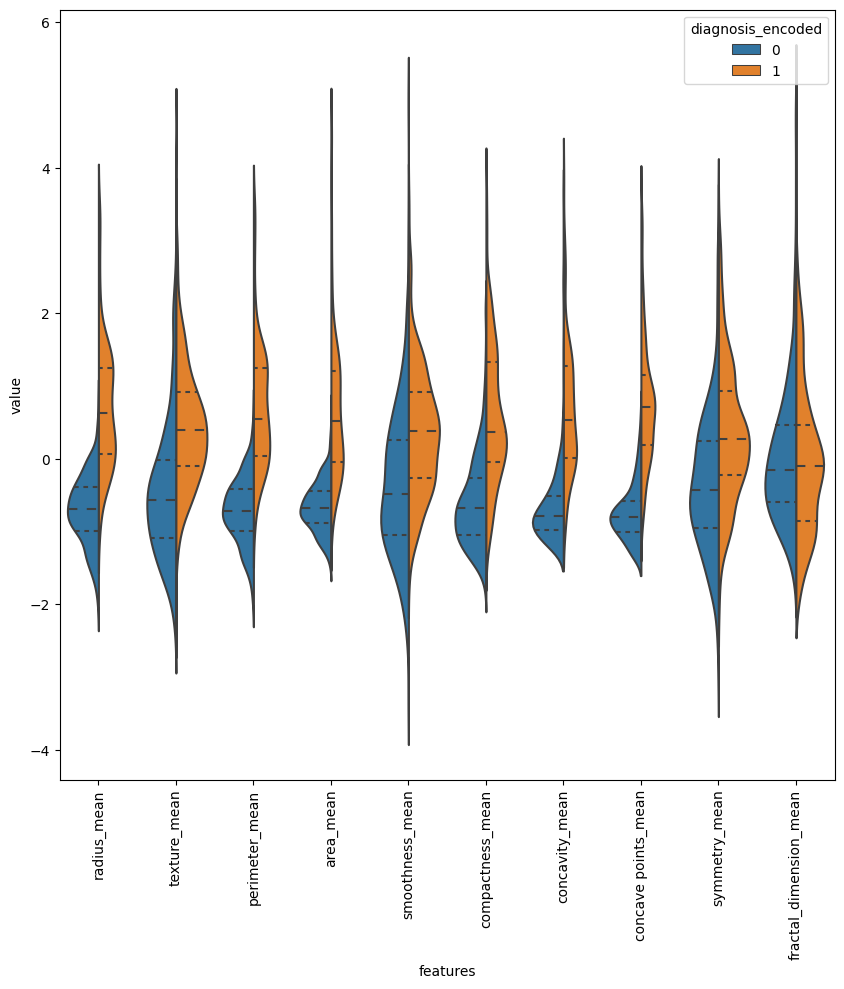

In [23]:
# first ten features
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y, data_n_2.iloc[:, 0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis_encoded",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis_encoded", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In area_mean feature, median of the Malignant and Benign looks like separated so it can be good for classification. However, in fractal_dimension_mean feature, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification.

second Ten features

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

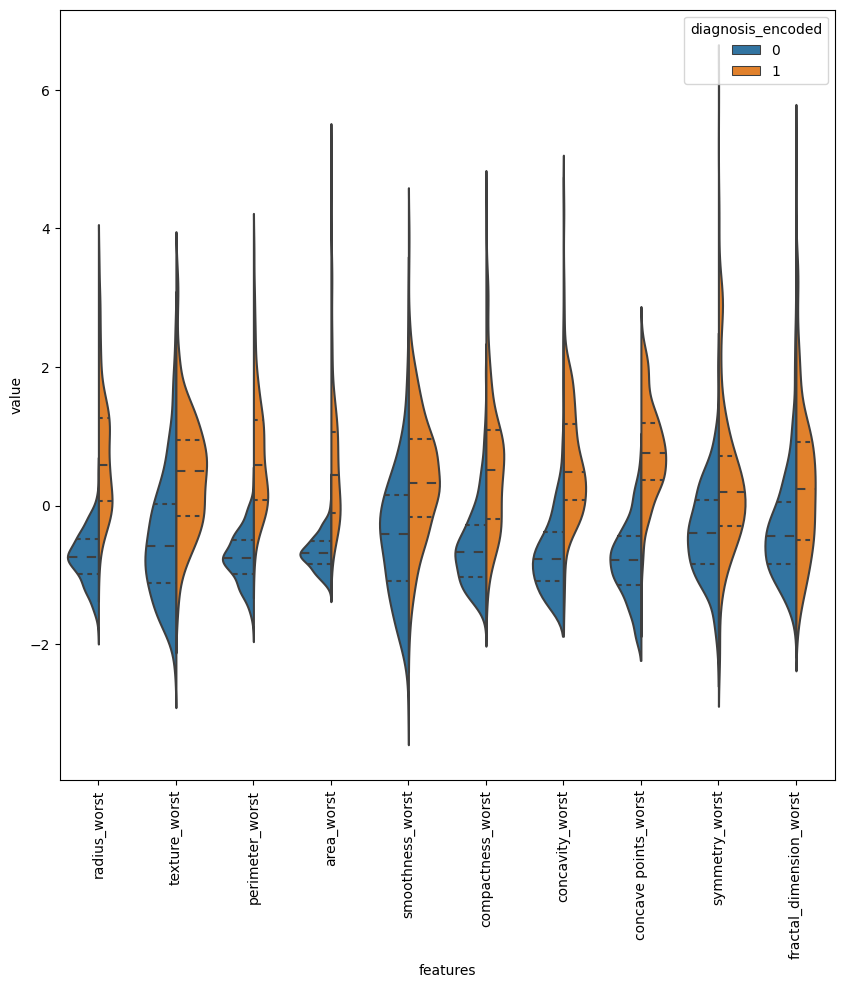

In [24]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis_encoded",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis_encoded", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

## Outliers

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

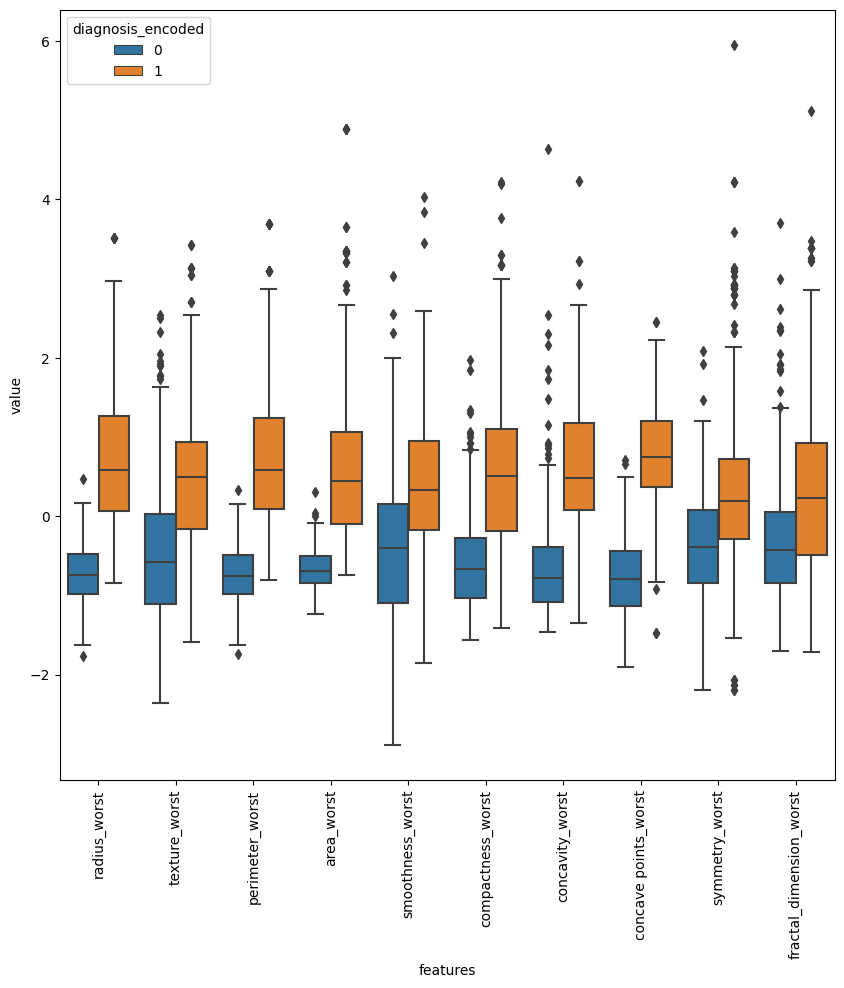

In [25]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis_encoded", data=data)
plt.xticks(rotation=90)

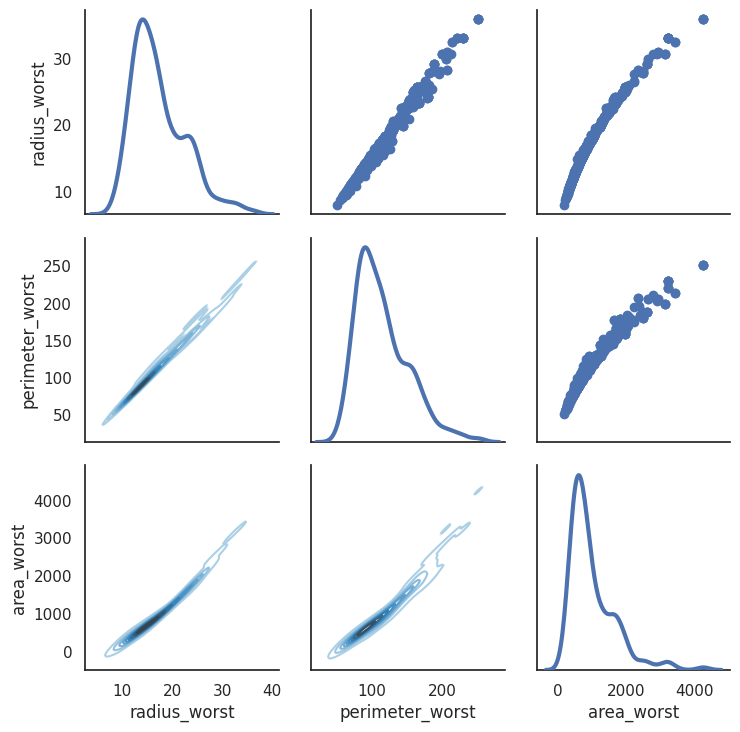

In [26]:
sns.set(style="white")
xx = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(xx, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

 radius_worst, perimeter_worst and area_worst are correlated as it can be seen in pair grid plot.

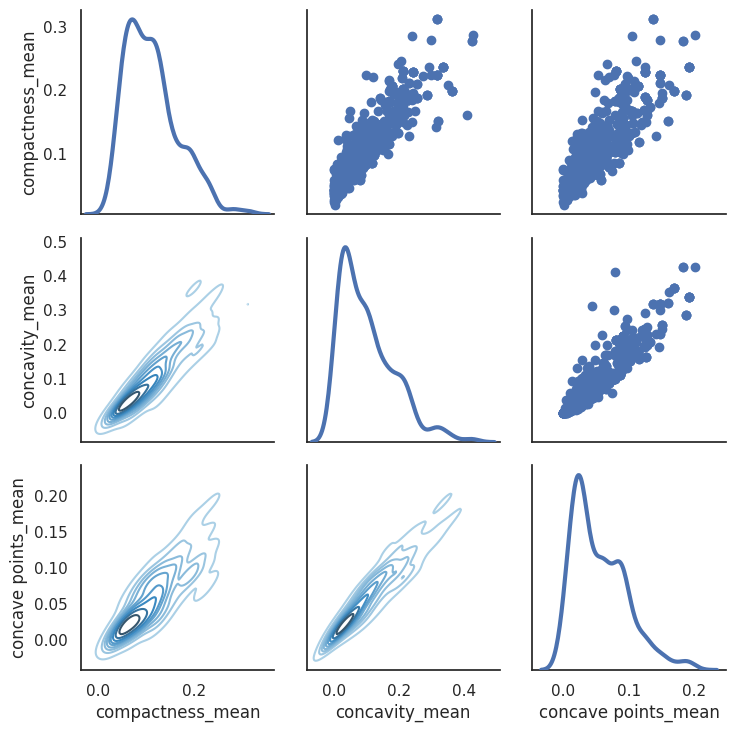

In [27]:
sns.set(style="white")
xx = x.loc[:,['compactness_mean', 'concavity_mean' , 'concave points_mean']]
g = sns.PairGrid(xx, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

Compactness_mean, concavity_mean and concave points_mean are correlated with each other.

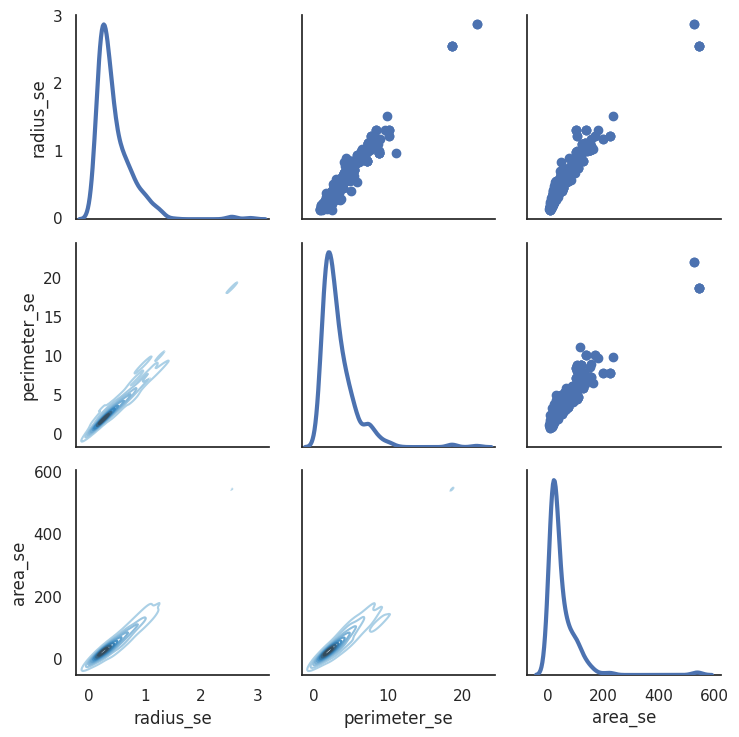

In [28]:
sns.set(style="white")
xx = x.loc[:,['radius_se', 'perimeter_se' , 'area_se' ]]
g = sns.PairGrid(xx, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

radius_se, perimeter_se and area_se are correlated

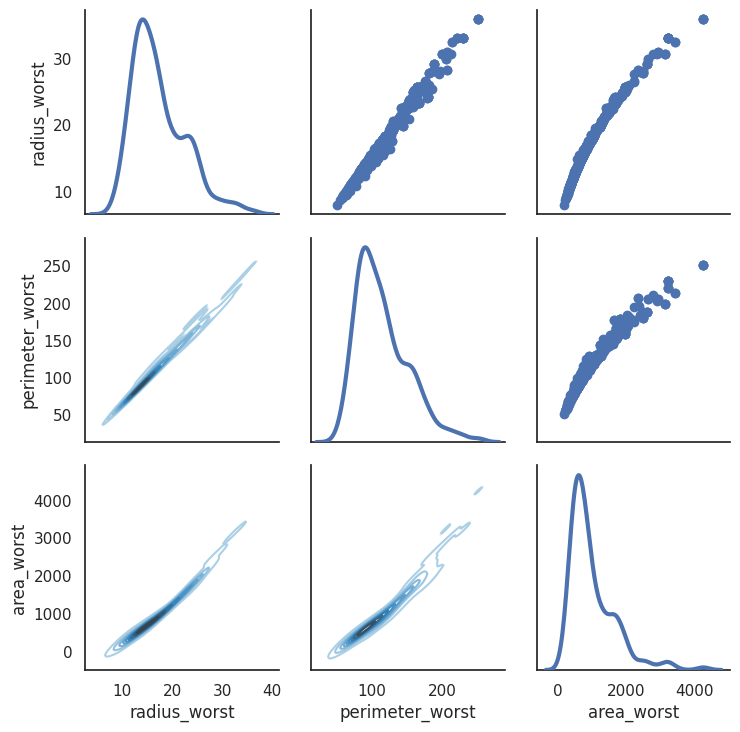

In [29]:
sns.set(style="white")
xx = x.loc[:,['radius_worst', 'perimeter_worst' , 'area_worst' ]]
g = sns.PairGrid(xx, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

radius_worst, perimeter_worst and area_worst are correlated

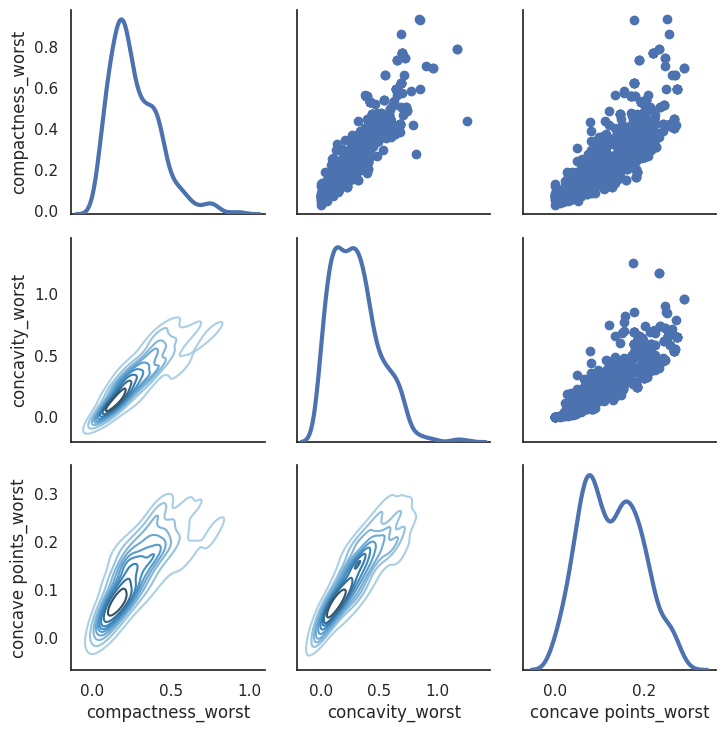

In [30]:
sns.set(style="white")
xx = x.loc[:,['compactness_worst', 'concavity_worst' , 'concave points_worst' ]]
g = sns.PairGrid(xx, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

Compactness_worst, concavity_worst and concave points_worst are correlated

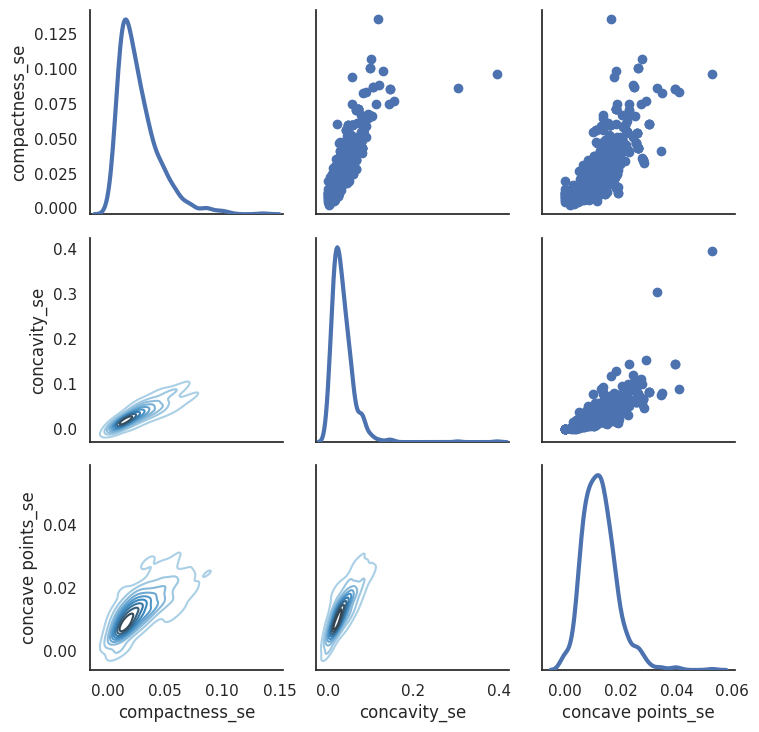

In [31]:
sns.set(style="white")
xx = x.loc[:,['compactness_se', 'concavity_se' , 'concave points_se']]
g = sns.PairGrid(xx, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

Compactness_se, concavity_se and concave points_se are correlated


<Axes: >

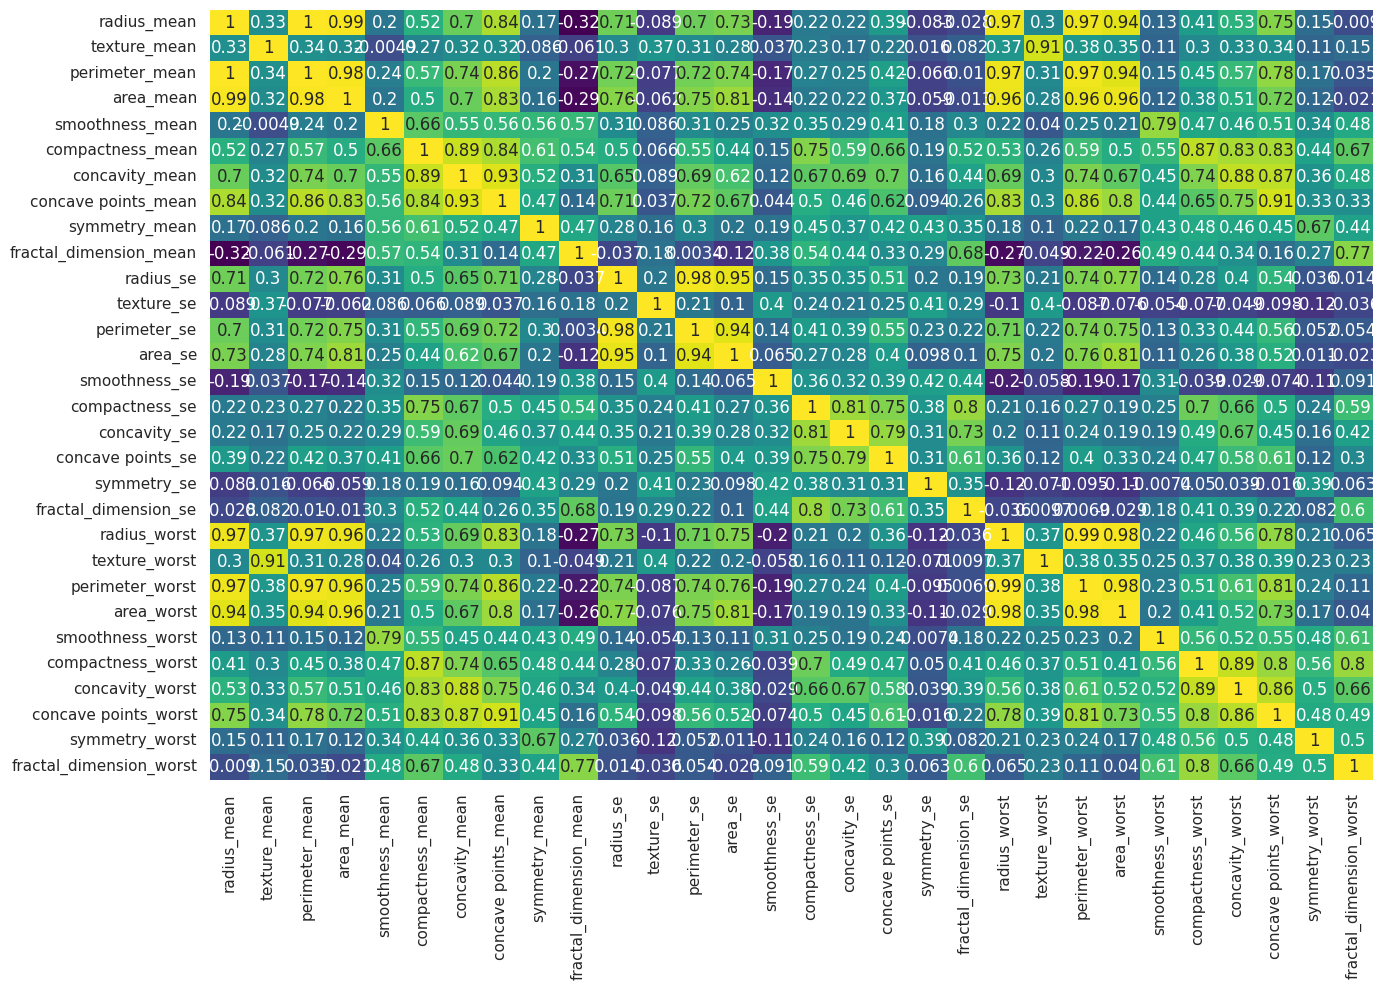

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(x.corr(),cmap='viridis',annot=True,cbar=False)

 radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only area_mean.

 'texture_worst'and 'texture_mean' are correlated with each other so we will use only texture mean.

 'area_worst'and 'area_mean' are correlated with each other so we will use only texture mean.

# Conclusion


### radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only area_mean.

### Compactness_mean, concavity_mean and concave points_mean are correlated with each other. so we only choose concavity_mean.

### radius_se, perimeter_se and area_se are correlated so we use area_se.

### radius_worst, perimeter_worst and area_worst are correlated so we use area_worst.

### Compactness_worst, concavity_worst and concave points_worst so weI use compactness_worst.

### Compactness_se, concavity_se and concave points_se so weI use concavity_se.

###  'texture_worst'and 'texture_mean' are correlated with each other so we will use only texture mean.

### 'area_worst'and 'area_mean' are correlated with each other so we will use only texture mean.


In [33]:
drop_list1 = ['perimeter_mean','radius_mean',
              'compactness_mean','concave points_mean',
              'radius_se','perimeter_se',
              'radius_worst','perimeter_worst',
              'concavity_worst','concave points_worst',
              'compactness_se','concave points_se',
              'texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
19,14.36,566.3,0.0978,0.0666,0.1885,0.0577,0.7886,23.560,0.0085,0.0239,0.0198,0.0023,0.1440,0.1773,0.2977,0.0726
20,15.71,520.0,0.1075,0.0457,0.1967,0.0681,0.7477,14.670,0.0041,0.0170,0.0168,0.0024,0.1312,0.2776,0.3184,0.0818
21,12.44,273.9,0.1024,0.0296,0.1815,0.0690,0.9768,15.700,0.0096,0.0198,0.0203,0.0030,0.1324,0.1148,0.2450,0.0777
37,18.42,523.8,0.0898,0.0256,0.1467,0.0586,2.3420,14.160,0.0044,0.0134,0.0267,0.0018,0.0970,0.0462,0.1987,0.0617
46,16.84,201.9,0.0860,0.0159,0.1769,0.0650,0.9567,8.205,0.0090,0.0159,0.0257,0.0026,0.1297,0.1357,0.3105,0.0741


In [34]:
x_1.columns

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'compactness_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [35]:
len(x_1.columns)

16

In [36]:
extracted_features_list = ['texture_mean', 'area_mean', 'smoothness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'symmetry_worst', 'fractal_dimension_worst']

Given_features_list = {
    'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
    'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
    'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
    'smoothness_worst', 'compactness_worst', 'symmetry_worst',
    'fractal_dimension_worst'
}

# Convert the list to a set for easy comparison
extracted_features_list = set(extracted_features_list)

# Find features that are in the feature list but not in set F1
not_common_features = extracted_features_list - Given_features_list

# Convert back to a list if required
not_common_features_list = list(not_common_features)

# Print or use the features that are not common between the list and set F1
print("Features that are in the list but not in set F1:")
print(not_common_features_list)


Features that are in the list but not in set F1:
[]


In [37]:
features_list = ['texture_mean', 'area_mean', 'smoothness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'symmetry_worst', 'fractal_dimension_worst']

## MinMax Scaling

In [38]:
#MinMax scaler is also employed to bring the features of the dataset to a uniform range between 0 and 1

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the selected columns between 0 and 1
x_1[features_list] = scaler.fit_transform(x_1[features_list])

In [39]:
x_1.describe()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.341760,0.247295,0.403449,0.241542,0.455472,0.265873,0.190177,0.079840,0.183997,0.085971,0.234651,0.101974,0.416947,0.270896,0.269670,0.250647
std,0.144274,0.168228,0.121702,0.197126,0.154104,0.145003,0.115706,0.110752,0.102589,0.073035,0.149977,0.087253,0.144488,0.172627,0.122686,0.146457
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.246703,0.129777,0.315884,0.082357,0.343880,0.160865,0.110248,0.023175,0.119898,0.043245,0.133396,0.048443,0.323481,0.146579,0.195052,0.145975
50%,0.331417,0.198006,0.402076,0.197634,0.445039,0.246835,0.172339,0.042012,0.159864,0.070455,0.203358,0.083045,0.419419,0.228750,0.252612,0.223305
75%,0.425431,0.333998,0.479919,0.357193,0.532977,0.333333,0.245271,0.104596,0.230442,0.113636,0.289179,0.128028,0.515026,0.380189,0.321358,0.324576
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
len(x_1.columns)

16

# Base Model

Accuracy is:  0.9790209790209791


<Axes: >

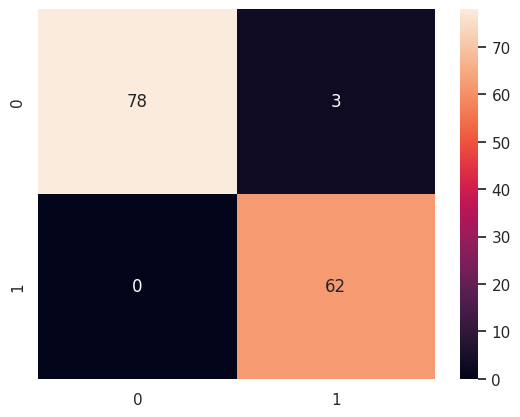

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.2, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

# Paper Techniques for Feature Selection

# The First stage of feature selection

### Identifying pairs of features with a correlation coefficient higher than 0.8, one of the features is dropped to avoid multicollinearity

(14 features will be removed and the remaining is 16)



<Axes: >

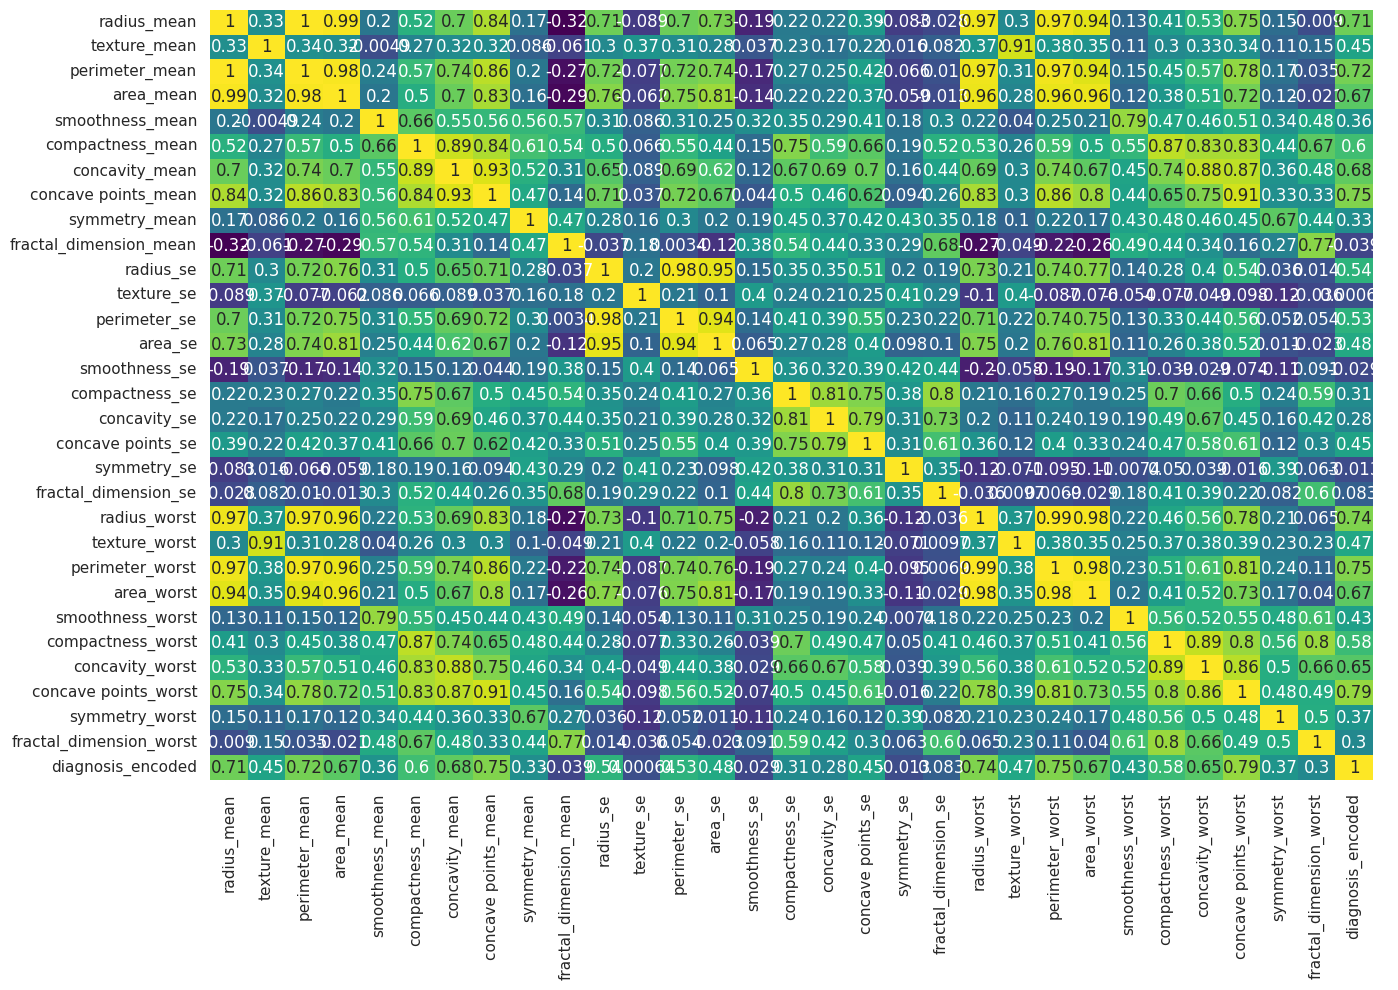

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True,cbar=False)

Set Features1

In [43]:
# Calculate the Pearson correlation matrix
corr_matrix = df.corr().abs()
# Create a mask to identify highly correlated features
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Find pairs of features with correlation coefficient > 0.8
high_corr_pairs = np.where(mask & (corr_matrix > 0.8))
# Set to store the features to drop
features_to_drop = set()
# Iterate over the indices of highly correlated feature pairs
for i, j in zip(*high_corr_pairs):
    if i != j:
        feature_i = corr_matrix.columns[i]
        feature_j = corr_matrix.columns[j]
        if feature_i not in features_to_drop:
            features_to_drop.add(feature_j)
# Drop the selected features from your dataset
df_filtered = df.drop(features_to_drop, axis=1)

In [44]:
df_filtered.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'symmetry_worst',
       'fractal_dimension_worst', 'diagnosis_encoded'],
      dtype='object')

In [45]:
extracted_features_list = [
    'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
    'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
    'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_se',
    'fractal_dimension_se', 'smoothness_worst', 'symmetry_worst',
    'fractal_dimension_worst', 'diagnosis_encoded'
]


Given_features_list = {
    'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
    'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
    'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
    'smoothness_worst', 'compactness_worst', 'symmetry_worst',
    'fractal_dimension_worst'
}

# Convert the list to a set for easy comparison
extracted_features_list = set(extracted_features_list)

# Find features that are in the feature list but not in set F1
not_common_features = extracted_features_list - Given_features_list

# Convert back to a list if required
not_common_features_list = list(not_common_features)

# Print or use the features that are not common between the list and set F1
print("Features that are in the list but not in set F1:")
print(not_common_features_list)


Features that are in the list but not in set F1:
['concave points_se', 'radius_mean', 'radius_se', 'compactness_mean', 'diagnosis_encoded', 'compactness_se']


Accuracy is:  1.0


<Axes: >

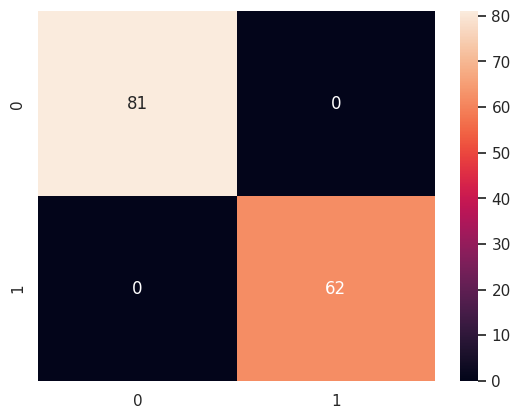

In [46]:
x_train, x_test, y_train, y_test = train_test_split(df_filtered, y, test_size=0.2, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

# The second stage of feature selection

The second stage is based on three different methods- Recursive Feature Elimination, Logistic Regression, and Univariate Selection(ANOVA F-value)


### Recursive Feature Elimination

In [47]:
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_encoded'],
      dtype='object')

In [48]:
#Recursive Feature Elimination

X_minimal = df[['texture_mean', 'area_mean', 'concavity_mean', 'fractal_dimension_mean', 'area_se', 'smoothness_worst', 'compactness_worst', 'symmetry_worst']]
# Create an instance of the Extra Trees classifier
estimator = ExtraTreesClassifier()

# Create the RFE object with the Extra Trees classifier and the desired number of features to keep
rfe = RFE(estimator, n_features_to_select=8)

# Perform RFE feature selection
X_RFE_selected = rfe.fit(df, y)

# Extract the selected features using the support_ attribute of the RFE object
selected_RFE_indices = rfe.support_

# Get the names of the selected features
X_RFE_selected = df.columns[selected_RFE_indices]

# Print or use the selected features
print(f"Top 8 features by RFE: {X_RFE_selected}")

Top 8 features by RFE: Index(['area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'concavity_worst', 'concave points_worst',
       'diagnosis_encoded'],
      dtype='object')


### Logistic Regression

In [49]:
# # Create and fit the Logistic Regression model
# model = LogisticRegression(solver='liblinear')
# model.fit(X, y)

# # Calculate feature importance coefficients
# coefficients = model.coef_.ravel()

# # Create feature selection object
# selector = SelectFromModel(model, max_features=8)

# # Sort features by their absolute coefficient value
# sorted_features = np.argsort(np.abs(coefficients))[::-1]

# # Select the top 8 features
# top_8_features = sorted_features[:8]

# # Print the top 8 features
# print(f"Top 8 features (by importance): {X.columns[top_8_features]}")

# #save the top 8 features
# X_LR_selected = X[X.columns[top_8_features]]

In [50]:
# Separate features and target variable
X = df.drop('diagnosis_encoded', axis=True)
y = df['diagnosis_encoded']

# Create and fit the Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X, y)

# Create feature selection object
selector = SelectFromModel(model, max_features=8)

# Fit the selector and get the transformed features
X_LR_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support()

# Get the names of the selected features
X_LR_selected= X.columns[selected_indices]

# Print or use the selected features
print(f"Top 8 features LR: {X_LR_selected}")


Top 8 features LR: Index(['radius_mean', 'compactness_mean', 'concavity_mean', 'texture_se',
       'radius_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')


### Univariate Selection(ANOVA F-value)



In [51]:
X = df.drop('diagnosis_encoded', axis = True)
y = df['diagnosis_encoded']

# Create feature selection object
selector = SelectKBest(f_classif, k=8)

# Fit the feature selection object
selector.fit_transform(X, y)

# Get the selected feature indices
selected_features = selector.get_support(indices=True)

ANOVA_selected = X.columns[selected_features]
# Print the selected features
print(f"Top 8 features by ANOVA F-value: {ANOVA_selected}")

Top 8 features by ANOVA F-value: Index(['radius_mean', 'perimeter_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')


In [52]:
# Create an empty set to store the final selected features
final_features = set()

# Check each feature in the selected features of each method
for feature in X_RFE_selected:
    if feature in X_LR_selected or feature in ANOVA_selected:
        final_features.add(feature)

# Check remaining features in method2 and method3
for feature in X_LR_selected:
    if feature not in final_features and feature in ANOVA_selected:
        final_features.add(feature)

for feature in ANOVA_selected:
    if feature not in final_features:
        final_features.add(feature)

# Convert set to list for further processing
final_features_list = list(final_features)

# Print the final list of selected features
print(f"Features recommended by at least two methods: {final_features_list}")



Features recommended by at least two methods: ['concave points_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'concavity_worst', 'concavity_mean', 'perimeter_worst', 'concave points_mean', 'radius_worst']


In [53]:
F2 = {
    'texture_mean', 'area_mean', 'concavity_mean', 'fractal_dimension_mean',
    'area_se', 'smoothness_worst', 'compactness_worst', 'symmetry_worst'
}

extracted_features = [
    'concave points_worst', 'radius_worst', 'area_worst', 'perimeter_mean', 'area_mean', 'area_se', 'perimeter_worst', 'concavity_mean', 'radius_mean', 'perimeter_se'
]
# Convert recommended features to a set for easy comparison
set_recommended_features = set(extracted_features)

# Find features in F2 that are not common with the recommended features
not_common_features = set(F2) - set_recommended_features

# Display features that are in F2 but not in the recommended list
print("Features in F2 but not common with our extracted features:")
print(list(not_common_features))


Features in F2 but not common with our extracted features:
['fractal_dimension_mean', 'smoothness_worst', 'texture_mean', 'symmetry_worst', 'compactness_worst']


Accuracy is:  0.9534883720930233


<Axes: >

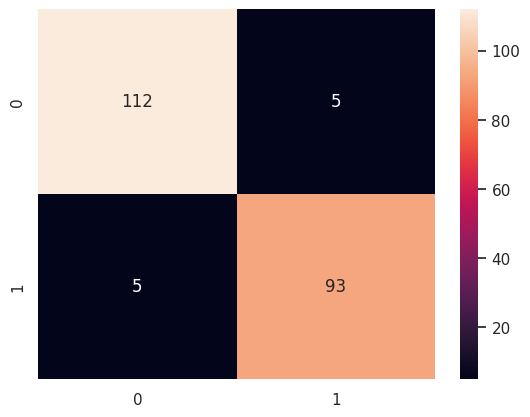

In [54]:
df_final_features = df[final_features_list]
x_train, x_test, y_train, y_test = train_test_split(df_final_features, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

# Model Development

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")


# Models with default parameters
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
mlp_classifier = MLPClassifier()
knn_classifier = KNeighborsClassifier()

models = {
    'Random Forest': rf_classifier,
    'Support Vector Machine': svm_classifier,
    'Decision Tree': dt_classifier,
    'Multilayer Perceptron': mlp_classifier,
    'K-Nearest Neighbors': knn_classifier
}

# 5-fold cross-validation with recall scoring
for model_name, model in models.items():
    recall_scores_initial = cross_val_score(model, X, y, cv=5, scoring='recall')
    # recall_scores_minimal = cross_val_score(model, X_minimal, y, cv=5, scoring='recall')

    print("Model:", model_name)
    print("Recall Scores (Initial Dataset):", recall_scores_initial)


Model: Random Forest
Recall Scores (Initial Dataset): [1.         0.97183099 1.         1.         0.98591549]
Model: Support Vector Machine
Recall Scores (Initial Dataset): [0.88732394 0.8028169  0.91666667 0.97222222 0.90140845]
Model: Decision Tree
Recall Scores (Initial Dataset): [1.         0.98591549 0.94444444 0.98611111 0.98591549]
Model: Multilayer Perceptron
Recall Scores (Initial Dataset): [0.85915493 0.90140845 0.84722222 0.98611111 0.95774648]
Model: K-Nearest Neighbors
Recall Scores (Initial Dataset): [0.94366197 0.87323944 0.95833333 0.95833333 0.94366197]


In [56]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10]
}

# Create the Random Forest classifier
random_forest = RandomForestClassifier()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, scoring='recall', cv=5)
grid_search.fit(X, y)

# Get the best parameters and the best recall score
best_params = grid_search.best_params_
best_recall_score = grid_search.best_score_

print("Random Forest - Grid Search Results:")
print(f"Best Parameters: {best_params}")
print(f"Best Recall Score: {best_recall_score}")

Random Forest - Grid Search Results:
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Best Recall Score: 0.9971830985915492


In [57]:
# Define the parameter grids for grid search


svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

decision_tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10]
}

mlp_param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001]
}

knn_param_grid = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}

# Create the classifiers
random_forest = RandomForestClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()
mlp = MLPClassifier()
knn = KNeighborsClassifier()

classifiers = [ svm, decision_tree, mlp, knn]
classifier_names = [ 'Support Vector Machine', 'Decision Tree', 'Multilayer Perceptron', 'K-Nearest Neighbors']
param_grids = [ svm_param_grid, decision_tree_param_grid, mlp_param_grid, knn_param_grid]

# Perform grid search with 5-fold cross-validation for each classifier
for classifier, classifier_name, param_grid in zip(classifiers, classifier_names, param_grids):
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='recall', cv=5)
    grid_search.fit(X, y)

    best_params = grid_search.best_params_
    best_recall_score = grid_search.best_score_

    print(f"{classifier_name} - Grid Search Results:")
    print(f"Best Parameters: {best_params}")
    print(f"Best Recall Score: {best_recall_score}")

    best_classifier = classifier.__class__(**best_params)
    best_classifier.fit(X, y)


Support Vector Machine - Grid Search Results:
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Recall Score: 0.9523474178403756
Decision Tree - Grid Search Results:
Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'min_samples_split': 2}
Best Recall Score: 0.9971830985915492
Multilayer Perceptron - Grid Search Results:
Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Best Recall Score: 0.9494913928012518
K-Nearest Neighbors - Grid Search Results:
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Best Recall Score: 0.9775430359937403


In [64]:
# Hyperparameters tuning for Random Forest using optimal parameters from Grid Search.
param_grid = {
    'n_estimators': [200],
    'criterion': ['gini'],
    'max_depth': [None],
    'max_features': ['sqrt'],
    'min_samples_split': [2]
}

rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='recall')
grid_search.fit(X, y)

print("Random Forest - Best Recall Score:", grid_search.best_score_)

Random Forest - Best Recall Score: 0.991549295774648


### The optimal parameters according to the paper are different from the optimal parameters we inferred using Grid Search, our parameters gave higher accuracy. this maybe due to that the paper did not try the same combinations of parameters in their grid search or they used different random_state which can result in different outputs using same parameters.

In [66]:
# Hyperparameters tuning for Random Forest using the paper's optimal parameters.
param_grid = {
    'n_estimators': [200],
    'criterion': ['gini'],
    'max_depth': [10,],
    'max_features': ['log2'],
    'min_samples_split': [2]
}

rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='recall')
grid_search.fit(X, y)

print("Random Forest - Recall Score:", grid_search.best_score_)

Random Forest - Recall Score: 0.991549295774648
